# Notebook Parameters
---


## Notebook Settings

In [2]:
"""Jupyter settings"""
# Enable autoreload
%load_ext autoreload
%autoreload 2

# Pylint parameters
%config Completer.use_jedi = False

# Measure Runtime
# !pip install ipython-autotime
%load_ext autotime

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

time: 597 µs (started: 2021-04-23 10:25:52 +02:00)


## Imported Packages

In [3]:
"""Packages for manipulation of vectors, arrays, dataframes"""
import numpy as np
import pandas as pd

# Change display settings of pandas
pd.set_option("display.max_row", 100)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_colwidth", None)

"""Packages for data visualization"""
import seaborn as sns
from matplotlib import pyplot as plt

# %matplotlib inline

time: 1.23 s (started: 2021-04-23 10:25:52 +02:00)


In [4]:
import os

time: 390 µs (started: 2021-04-23 10:25:53 +02:00)


In [5]:
import skimage.io as io

time: 50.1 ms (started: 2021-04-23 10:25:53 +02:00)


In [6]:
import string

import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from textblob import TextBlob

time: 456 ms (started: 2021-04-23 10:25:53 +02:00)


# Loading Data
---
ref: [Shopee: Before we start](https://www.kaggle.com/maksymshkliarevskyi/shopee-before-we-start-eda-phash-baseline)

## Work Directory

In [7]:
WORK_DIR = '../raw_data/shopee-product-matching'
os.listdir(WORK_DIR)

['test_images',
 '.DS_Store',
 'test.csv',
 'train.csv',
 'train_images',
 'sample_submission.csv']

time: 2.64 ms (started: 2021-04-23 10:25:54 +02:00)


## CSV to DataFrame

In [8]:
train_data = pd.read_csv('../raw_data/shopee-product-matching/train.csv') 
test_data = pd.read_csv('../raw_data/shopee-product-matching/test.csv')
ss_data = pd.read_csv('../raw_data/shopee-product-matching/sample_submission.csv', index_col = 0)

time: 82.2 ms (started: 2021-04-23 10:25:54 +02:00)


In [9]:
train_df = train_data.copy()

time: 1.59 ms (started: 2021-04-23 10:25:54 +02:00)


In [10]:
test_df = test_data.copy()

time: 491 µs (started: 2021-04-23 10:25:54 +02:00)


In [11]:
ss_df = ss_data.copy()

time: 498 µs (started: 2021-04-23 10:25:54 +02:00)


In [12]:
print('-' * 35, 'test', '-' * 35)
print(f"test_df shape: {test_df.shape}")
print("test_df head:")
test_df.head()

----------------------------------- test -----------------------------------
test_df shape: (3, 4)
test_df head:


,posting_id,image,image_phash,title
0,test_2255846744,0006c8e5462ae52167402bac1c2e916e.jpg,ecc292392dc7687a,Edufuntoys - CHARACTER PHONE ada lampu dan musik/ mainan telepon
1,test_3588702337,0007585c4d0f932859339129f709bfdc.jpg,e9968f60d2699e2c,(Beli 1 Free Spatula) Masker Komedo | Blackheads Mask 10gr by Flawless Go Surabaya | Flawless.Go
2,test_4015706929,0008377d3662e83ef44e1881af38b879.jpg,ba81c17e3581cabe,READY Lemonilo Mie instant sehat kuah dan goreng


time: 6.62 ms (started: 2021-04-23 10:25:54 +02:00)


In [13]:
print('-' * 35, 'sample submission', '-' * 35)
print(f"ss_df shape: {ss_df.shape}")
print("ss_df head:")
ss_df.head()

----------------------------------- sample submission -----------------------------------
ss_df shape: (3, 1)
ss_df head:


,matches
posting_id,
test_2255846744,test_2255846744
test_3588702337,test_3588702337
test_4015706929,test_4015706929


time: 4.81 ms (started: 2021-04-23 10:25:54 +02:00)


In [14]:
print('-' * 35, 'train', '-' * 35)
print(f"train_df shape: {train_df.shape}")
print("train_df head:")
train_df.head()

----------------------------------- train -----------------------------------
train_df shape: (34250, 5)
train_df head:


,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DOUBLE FOAM TAPE",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Campur - Leher Kancing (DPT001-00) Batik karakter Alhadi,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


time: 4.62 ms (started: 2021-04-23 10:25:54 +02:00)


## Images to DataFrame

In [15]:
print('Train images: %d' %len(os.listdir(os.path.join(WORK_DIR, "train_images"))))
print('Test images: %d' %len(os.listdir(os.path.join(WORK_DIR, "test_images"))))

Train images: 32412
Test images: 3
time: 85.9 ms (started: 2021-04-23 10:25:54 +02:00)


In [16]:
train_images = WORK_DIR + "/train_images/" + train_df['image']
train_df['path'] = train_images

test_images = WORK_DIR + "/test_images/" + test_df['image']
test_df['path'] = test_images

time: 6.63 ms (started: 2021-04-23 10:25:54 +02:00)


In [17]:
train_df.head()

,posting_id,image,image_phash,title,label_group,path
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,../raw_data/shopee-product-matching/train_images/0000a68812bc7e98c42888dfb1c07da0.jpg
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DOUBLE FOAM TAPE",2937985045,../raw_data/shopee-product-matching/train_images/00039780dfc94d01db8676fe789ecd05.jpg
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,../raw_data/shopee-product-matching/train_images/000a190fdd715a2a36faed16e2c65df7.jpg
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Campur - Leher Kancing (DPT001-00) Batik karakter Alhadi,4093212188,../raw_data/shopee-product-matching/train_images/00117e4fc239b1b641ff08340b429633.jpg
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,../raw_data/shopee-product-matching/train_images/00136d1cf4edede0203f32f05f660588.jpg


time: 4.39 ms (started: 2021-04-23 10:25:54 +02:00)


# EDA
---


## [Labels](https://www.kaggle.com/andradaolteanu/i-shopee-text-prep-fe-image-augmentation?scriptVersionId=58133547&cellId=21)

In [18]:
# How many unique labels in the train set ?
print(f"label_group unique values: {train_df['label_group'].nunique()}")

label_group unique values: 11014
time: 1.96 ms (started: 2021-04-23 10:25:54 +02:00)


In [19]:
# Get count of values on each group
groups_df = train_df["label_group"].value_counts().reset_index()
groups_df.columns = ["group", "count"]

time: 2.92 ms (started: 2021-04-23 10:25:54 +02:00)


In [20]:
# Print info
print("No. of unique groups: {:,}".format(len(groups_df)), "\n" +
      "Max no. of apparitions in 1 group: {}".format(groups_df["count"].max()), "\n" +
      "Min no. of apparitions in 1 group: {}".format(groups_df["count"].min()))

No. of unique groups: 11,014 
Max no. of apparitions in 1 group: 51 
Min no. of apparitions in 1 group: 2
time: 1.06 ms (started: 2021-04-23 10:25:54 +02:00)


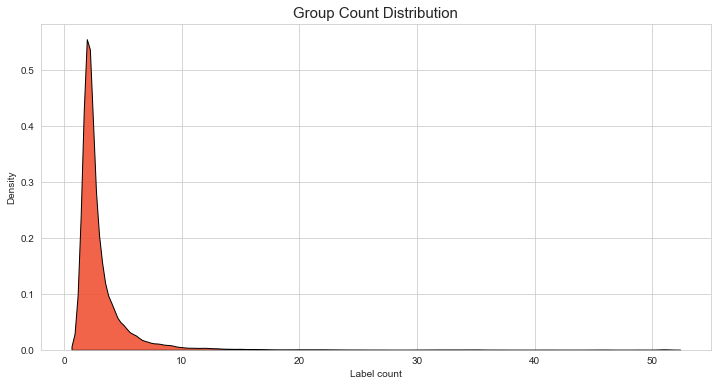

time: 166 ms (started: 2021-04-23 10:25:54 +02:00)


In [21]:
# Plot distribution
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
plt.title('Group Count Distribution', fontsize = '15')
sns.kdeplot(groups_df['count'], fill = True, 
            color = '#f15335', 
            edgecolor = 'black', alpha = 0.9)
plt.xlabel('Label count')
plt.show();

## [Titles](https://www.kaggle.com/maksymshkliarevskyi/shopee-before-we-start-eda-phash-baseline?scriptVersionId=56755502&cellId=10)

**How long are the titles ?**

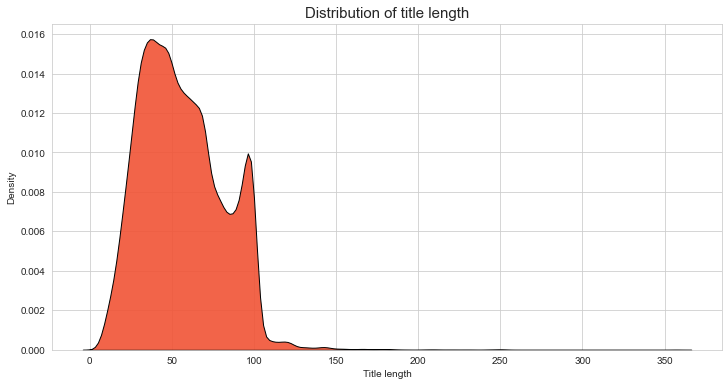

time: 202 ms (started: 2021-04-23 10:25:54 +02:00)


In [22]:
sns.set_style("whitegrid")
plt.figure(figsize = (12, 6))
plt.title('Distribution of title length', fontsize = '15')
sns.kdeplot(train_df['title'].apply(lambda x: len(x)), fill = True, 
            color = '#f15335', 
            edgecolor = 'black', alpha = 0.9)
plt.xlabel('Title length')
plt.show();

## [Shape of images](https://www.kaggle.com/maksymshkliarevskyi/shopee-before-we-start-eda-phash-baseline?scriptVersionId=56755502&cellId=11)

In [23]:
# Create a column for the shape
train_df['img_shape'] = train_df['path'].apply(lambda x: np.shape(io.imread(x)))

time: 2min 54s (started: 2021-04-23 10:25:55 +02:00)


In [24]:
train_df.head()

,posting_id,image,image_phash,title,label_group,path,img_shape
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,../raw_data/shopee-product-matching/train_images/0000a68812bc7e98c42888dfb1c07da0.jpg,"(1024, 1024, 3)"
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DOUBLE FOAM TAPE",2937985045,../raw_data/shopee-product-matching/train_images/00039780dfc94d01db8676fe789ecd05.jpg,"(1000, 1000, 3)"
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,../raw_data/shopee-product-matching/train_images/000a190fdd715a2a36faed16e2c65df7.jpg,"(640, 640, 3)"
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Campur - Leher Kancing (DPT001-00) Batik karakter Alhadi,4093212188,../raw_data/shopee-product-matching/train_images/00117e4fc239b1b641ff08340b429633.jpg,"(640, 640, 3)"
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,../raw_data/shopee-product-matching/train_images/00136d1cf4edede0203f32f05f660588.jpg,"(756, 756, 3)"


time: 5.86 ms (started: 2021-04-23 10:28:49 +02:00)


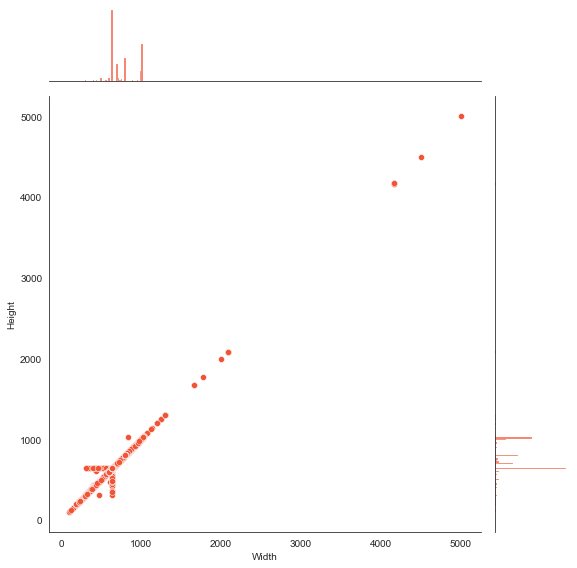

time: 752 ms (started: 2021-04-23 10:28:49 +02:00)


In [25]:
# Visualize image shapes distribution
shapes = pd.DataFrame().from_records(train_df['img_shape'])
shapes.columns = ['Width', 'Height', 'Colors']

sns.set_style("white")
sns.jointplot(x = shapes.iloc[:, 0].astype('float32'), 
              y = shapes.iloc[:, 1].astype('float32'),
              height = 8, color = '#f15335')
plt.show()

# Text Preprocessing
---
ref: [Shopee: text prep | FE | image augmentation](https://www.kaggle.com/andradaolteanu/i-shopee-text-prep-fe-image-augmentation)

### Text Preprocessing - Step by Step Example

In [26]:
# Original
original = train_df["title"][99]
print(f"Before: {original}")

# ~~~~~ Convert to lower case ~~~~~
lower = original.lower()
print(f"Lower case: {lower}")

# ~~~~~ Remove punctuation ~~~~~
### !”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]:
wo_punct = lower.translate(str.maketrans('','',string.punctuation))
print("Remove punctuation: {wo_punct}")

# ~~~~~ Remove whitespaces ~~~~~
wo_whitespaces = wo_punct.strip()
print("Remove whitespaces: {wo_whitespaces}")

# ~~~~~ Tokenize words ~~~~~
tokenize = word_tokenize(wo_whitespaces)
print(f"Tokenized: {tokenize}")

# ~~~~~ Remove stopwords ~~~~~
text_wo_sw = [word for word in tokenize if not word in stopwords.words()]
print(f"Remove stopwords: {text_wo_sw}")

# ~~~~~ Lemmatization ~~~~~
lemmatizer = WordNetLemmatizer()
lemmatized_text = [lemmatizer.lemmatize(word) for word in text_wo_sw]
print(f"Lemmatization: {lemmatized_text}")

# ~~~~~ Part of speech tagging ~~~~~
pos_text = TextBlob(' '.join(lemmatized_text))
print(f"POS: {pos_text.tags}")

# # ~~~~~ Named entity recognition ~~~~~
# ner_text = ne_chunk(pos_tag(lemmatized_text))
# print(f"NER: {ner_text}")

Before: Tzuki Beauty Soap
Lower case: tzuki beauty soap
Remove punctuation: {wo_punct}
Remove whitespaces: {wo_whitespaces}
Tokenized: ['tzuki', 'beauty', 'soap']
Remove stopwords: ['tzuki', 'beauty', 'soap']
Lemmatization: ['tzuki', 'beauty', 'soap']
POS: [('tzuki', 'JJ'), ('beauty', 'NN'), ('soap', 'NN')]
time: 1.11 s (started: 2021-04-23 10:28:50 +02:00)


## Text Preprocessing - Function

In [27]:
def preprocess_title(title):
    '''Text Preprocessing Performance.
    title: the string that needs prepped.'''
    
    # Lower Case
    title = title.lower()
    # Remove Punctuation
    title = title.translate(str.maketrans('','',string.punctuation))
    # Remove whitespaces
    title = title.strip()
    # Tokenize
    tokens_title = word_tokenize(title)
    # Remove stopwords
    tokens_title = [word for word in tokens_title if not word in stopwords.words()]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemm_text = [lemmatizer.lemmatize(word) for word in tokens_title]
    prepped_title = ' '.join(lemm_text)

    return prepped_title

def get_POS(prepped_title):
    '''Gets Part of Speech.
    prepped_text: the already prepped text'''
    
    # Part of speech tagging
    pos_text = TextBlob(prepped_title)
    pos_text = ' '.join([j for (i, j) in pos_text.tags])

    return pos_text


time: 622 µs (started: 2021-04-23 10:28:51 +02:00)


In [28]:
# Process preprocessed title
train_df["title_prep"] = train_df["title"].apply(lambda x: preprocess_title(x))

time: 14min 2s (started: 2021-04-23 10:28:51 +02:00)


In [29]:
# Add part of speech
train_df["pos"] = train_df["title_prep"].apply(lambda x: get_POS(x))

time: 22.2 s (started: 2021-04-23 10:42:53 +02:00)


In [31]:
# Read in prepped data
# train_df_prep = pd.read_csv("../raw_data/shopee-preprocessed-data/train_title_prepped.csv")
# train_df_prep["label_group"] = train_df_prep["label_group"].astype(str)

time: 470 µs (started: 2021-04-23 10:46:40 +02:00)


# Text Model
---


***...To be developed***

## Resources to check

- [Text+Image : Metric learning](https://www.kaggle.com/nandhuelan/text-image-metric-learning)
- [Metric Learning Pipeline : Only Text Sbert](https://www.kaggle.com/tanulsingh077/metric-learning-pipeline-only-text-sbert)
- [Shopee Products Matching: Text Part [English+中文]](https://www.kaggle.com/finlay/shopee-products-matching-text-part-english)
- [Reaching 0.612 with Text Only : Shopee](https://www.kaggle.com/tanulsingh077/reaching-0-612-with-text-only-shopee)
- [Image and Text EDA - (Very) Naive Model](https://www.kaggle.com/manabendrarout/image-and-text-eda-very-naive-model)